#### 1. 문제 정의 : 5.9 최근접 쌍의 거리

#### 2. 알고리즘 설명
분할 정복 알고리즘을 이용합니다.       분할 정복 알고리즘이란 첫 번째 단계는 **분할**로 리스트 P를 두 개의 부분 리스트 Pi와 Pr로 분할합니다. P가 x좌표로 정렬되어 있으므로 단순히 리스트의 왼쪽 절반을 Pi, 오른쪽 절반을 Pr로 나눌 수 있습니다.      
이후 두 번째 단계인 **정복**을 통해 만약 분할된 리스트의 크기(점들의 개수)가 3 이하인 경우는 바로 결과를 계산합니다. 그러나 만약 점들이 4개 이상이라면 또다시 분할 정복 기법을 적용합니다.      
마지막 세 번째 단계인 **결합**에서 분할된 두 그룹 Pi와 Pj에서 최근접 쌍의 거리가 각각 di와 dr로 계산되었다고 할 때, 최종 결과는 di, dr, 양쪽 그룹에 걸쳐있는 최근접 점의 쌍에 의한 거리(dcorss) 중에서 가장 작은 값이 되어야 합니다. 이때 이 작은 값을 구해 반환하면 됩니다.

#### 3. 손으로 푼 예제
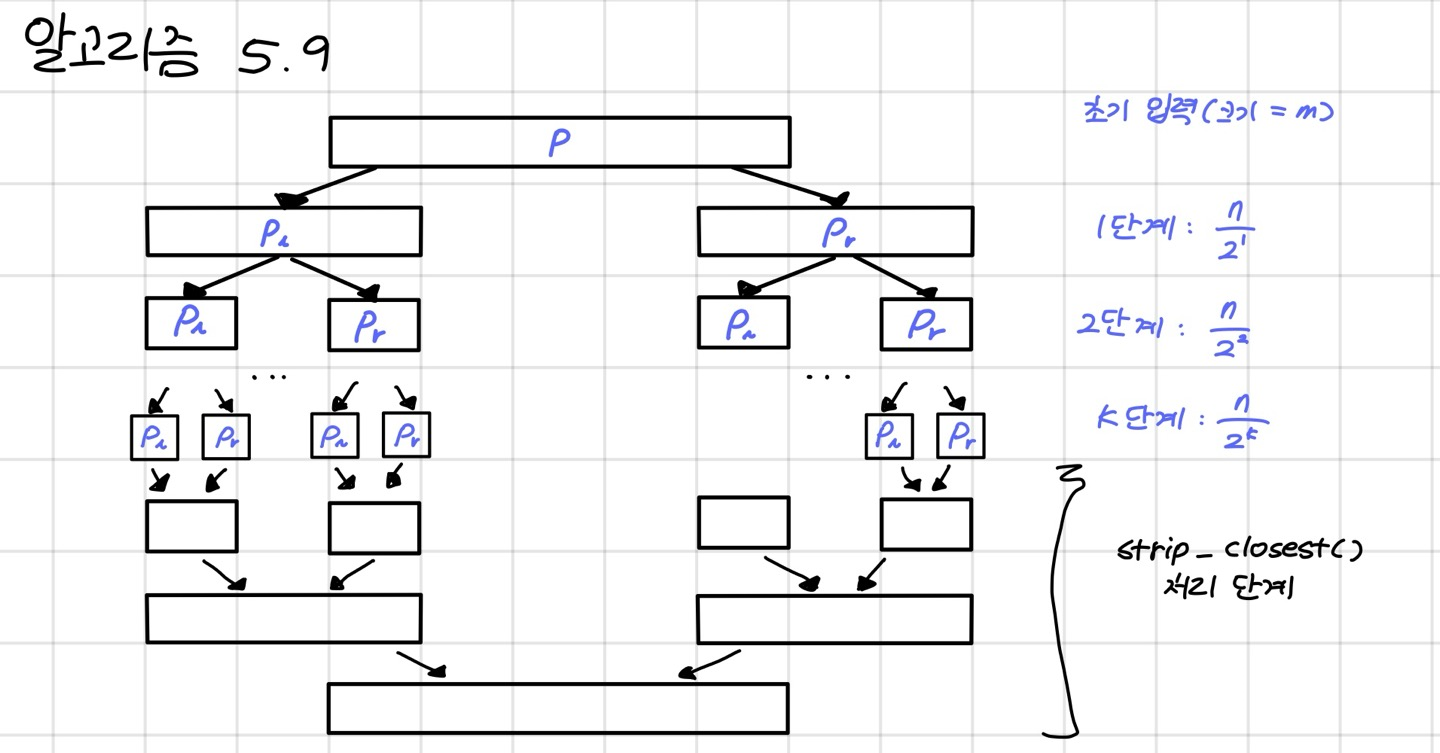

#### 4. 알고리즘 개요(입력 변수, 출력, 알고리즘 개요)
함수명 : strip_clossest      
입 력   변 수 : P = 띠 영역의 점들의 리스트, d = min(dp, dr)
출력 :   
함 수   설 명 : 


#### 5. 알고리즘 코드

In [9]:
def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair(p)
    
    mid = n//2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])

    ds = strip_closest(Pm, d)
    return ds

#### 6. 테스트 코드

In [ ]:
import math

def strip_closest(P, d):
    n = len(P)                            #리스트내의 점의 수
    d_min = d
    P.sort(key=lambda point: point[1])  #y축을 따라 정렬

    for i in range(n):                    #y가 최소인 점부터 순서대로
        j = i + 1 
        # P[i].y와 P[j].y의 차이가 D_min 이내일 떄까지만 처리
        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij = distance(P[i], P[j])
            if dij < d_min:
                d_min = dij
            j += 1
    return d_min                          #d_min 반환


def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair(p)
    
    mid = n//2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []

    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])

    ds = strip_closest(Pm, d)
    return ds

def closest_pair(p):
    n = len(p)
    mindist = float("inf")
    for i in range(n-1):
        for j in range(i+1, n):
            dist = distance(p[i], p[j])
            if dist<mindist:
                mindist = dist

    return mindist

def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


p = [(2,3), (12,30), (40,50), (5,1), (12,10), (3,4)]
p.sort(key = lambda point: point[0])
print("가장 가까운 두 점의 거리", closest_pair_dist(p, len(p)))

#### 7. 수행 결과
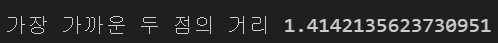

#### 8. 복잡도 분석   
이 알고리즘은 리스트를 정확히 반으로 분할하여 계산한다. n이 거듭제곱 n = 2^k라 가정하면 위 알고리즘은 전체 처리 괴정을 보여준다. 이는 입력 리스트 p는 단계가 진행됨에 따라 두 개의 부분 리스트 Pi와 Pr로 반복적으로 분할되며, 부분 리스트의 크기가 3 이하가 될 때까지 진행된다. 또한 부분 리스트의 크기가 3 이하가 되면 억지 기법을 통해 di와 dr을 계산한다.

그 다음 strip_closet()를 호출해 띠 영역의 최근접 쌍의 거리 dcross를 구하기 때문에 만약 y좌표를 기준으로 정렬을 사용한다면 각 단계에서의 전체 처리 시간이 O(n log2 n)이 된다. 따라서 전체 단계의 수가 k에 비례하므로 알고리즘의 시간 복잡도는 
O(k nlog2 n) = O(n(log2n)^2) 가 된다.

#### 9. 조별 협력 내용
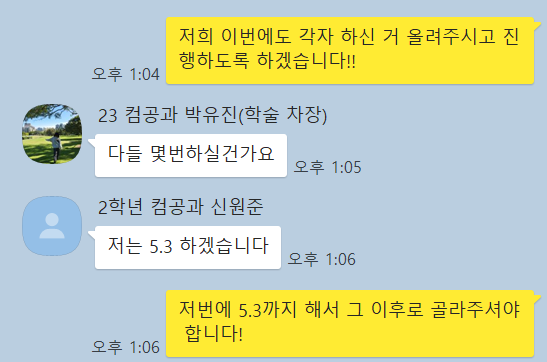